<a href="https://colab.research.google.com/github/victorviro/Clasifying-sentiment-of-reviews/blob/master/MLP_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-layer Perceptron and Backpropagation

## Multi-layer Perceptron 

An MLP is composed of one input layer, one or more hidden layers of [artificial neurons](https://en.wikipedia.org/wiki/Artificial_neuron)(particularly TLUs or threshold logic units) and one final layer of TLUs called the output layer. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.



![texto alternativo](https://www.oreilly.com/library/view/getting-started-with/9781786468574/graphics/B05474_04_05.jpg)

The signal flows only in one direction(from the inputs to the outputs), so this architecture is an example of a feedforward neural network

When an ANN contains a lot of hidden layers is known as a deep neural network and these networks are the base of the study of Deep learning, and more generally models containing deep stacks of computations.

The interest for these networks begun in 1986 when the backpropagation training algorithm was introduced. 




## Backpropagation

The backpropagation algorithm is based in two passes through the network(one forward, one backward). Let's see it in detail.


- It handles one mini-batch at a time, this is, it goes through to the full training set multiple times. Each pass is an epoch.


- Each mini-batch is passed to the input layer, which sends it to the first hidden layer. The computes the output of all the neurons in this layer and passes the result on to the next layer. This process is repeated until getting the output of the last layer. This is the forward pass. It is like making a prediction, except all intermediate results are preserved for the backward pass.


- The algorithm measures the network's output error, it uses a loss function that compares the desired output and the actual output of the network and returns some measure of the error.

- Then it goes through each layer in reverse(backward pass) computing how much each output connection contributed to the error(applying chain rule) and finally tweaks the weights of the connections to reduce the error(Gradient Descent step).

![texto alternativo](https://i.stack.imgur.com/7Ui1C.png)

Note: It is important to initialize all the hidden layer's connection weight randomly.

The authors of this algorithm replaced the step function with the logistic function, which has a well-defined nonzero derivative, allowing Gradient Descent to make progress at every step. Backpropagation works well with other activation functions as well, like hyperbolic tangent function, Relu...

But why do we need activation functions between layers?. If you apply chain rule on several linear transformations you will get a linear transformation. If you do not put these functions, a deep stack of layers is equivalent to a single layer and you cannot solve very complex problems with that. The purpose of the activation function is to introduce non-linearity into the network.

# Regression MLPs

MLPs can be used for regression tasks. For univariate regression(predict a single value) you need a single output neuron(the predicted value). For multivariate regression(predict multiple values at once), you need one output neuron per output dimension.

In general, when building an MLP for regression it is not usually used activation function for the output neurons(they are free to output any range of values). However, if you want that outputs will always be positive, you can use the ReLU activation function, or softplus in the output layer. Finally, if you want that the predictions will fall within a given range of values you can use the logistic function or hyperbolic tangent, and scale the labels to the adequate range.

The loss function typically is the mean squared error, but there are others like mean absolute error or Huber loss(a good choice if the training set has a lot of outliers).


# Clasification MLPs

MLPs can be used for classification tasks. For binary classification, you need a single output neuron using the logistic activation function(the predicted value will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class).

For multi-label binary classification, for example, predicts whether the incoming email is spam or no-spam, and simultaneously predicts whether it is an urgent or non-urgent email. In this case, you would need two output neurons, both using the logistic function: the first output will be the probability estimated that the email is spam and the second the probability estimated that the email is urgent. Generally, you can use one output neuron for each positive class.

For multiclass classification, this is when target variable can belong to more than two labels(for example classes 0 through 9 for digit image classification), you need to have one output neuron per class and you can use the softmax activation function for the whole output layer(softmax activation function ensure that all estimated probabilities are between 0 and 1).

Regarding the loss function, we are predicting probability distributions, the cross-entropy is generally a good option.

# MNIST fashion dataset

![texto alternativo](https://camo.githubusercontent.com/a2e4e2eb7beebba0496cdf0bd08761636b6ecddd/68747470733a2f2f692e6779617a6f2e636f6d2f30666237313934393761386236366164393938643132333561663237643930312e706e67)

In [1]:
import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [2]:
print(X_train_full.shape)

(60000, 28, 28)


The dataset is already split into a training set and a test set.

Since we are going to train the neural network using Gradient Descent, we must scale the input feature. We just scale the pixel intensity down to the 0-1 range by dividing them by 255.0.

In [0]:
X_train_full = X_train_full / 255.0

We need the list of classes names 

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# let's see what class represent the first image
class_names[y_train_full[0]]

'Ankle boot'

### Creating a model using Sequential API
Now let’s build the neural network. It is a classification MLP with two hidden layers

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

The first line creates a  Sequential model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.

Next, pass a list of layers to the model. The first layer is a  Flatten layer used to convert each input image into a 1D array: if it receives input data X, it computes  X.reshape(-1, 1). This layer does not have any parameters, it is just to do some simple preprocessing. Since it is the first layer, you should specify the input_shape: this does not include the batch size, only the shape of the instances. Alternatively, you could add a  keras.layers.InputLayer as the first layer, setting  shape=[28,28].


Next, we add a  Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each  Dense layer manages its weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).

Next a second  Dense hidden layer with 100 neurons, also using the ReLU activation function. 

Finally, a  Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

The model’s  summary()  method displays all the model’s layers, including each layer’s name, its output shape, and its number of parameters. The summary ends with the total number of parameters, trainable and non-trainable parameters.

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that  Dense layers often have a  lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which reaches to 235,500 parameters! This gives the model flexibility to fit the training data, but also the model runs the risk of overfitting, especially when you do not have a lot of training data.

You can easily get a model's list of layers or all the parameters of a specific layer(for a de4nse layer includes both the connection weight and the bias).

In [9]:
print(model.layers)
dense_3 = model.layers[3]
print(dense_3)
weigth, biases = dense_3.get_weights()
print(weigth[0:5], biases[0:5])


[<keras.layers.core.Flatten object at 0x7f66e1232908>, <keras.layers.core.Dense object at 0x7f66e12322b0>, <keras.layers.core.Dense object at 0x7f66e1232eb8>, <keras.layers.core.Dense object at 0x7f66e1239080>]
[[-0.08344731  0.05062839 -0.1473903  -0.10197224  0.09504732 -0.177553
   0.09958991  0.0007491  -0.0371723   0.13009366]
 [-0.1858958  -0.19105196 -0.15192553 -0.10910078  0.18888274  0.04740137
  -0.08409178 -0.13097033 -0.20229188 -0.12336727]
 [-0.13278203  0.06738234  0.03454864  0.07392576 -0.21242766  0.07000265
   0.18933678  0.12681904  0.20364097 -0.18167685]
 [-0.08463646  0.1950235   0.1426683   0.08156613  0.06967828  0.04318601
   0.17055169 -0.15584442  0.05400521 -0.05336803]
 [-0.00631903  0.01425207 -0.13982254 -0.13407125  0.12167487  0.07378361
   0.1043663   0.01090299  0.18947926 -0.22044963]] [0. 0. 0. 0. 0.]


Notice that the Dense layer initialized the connection weights randomly, and biases were initialized to zeros. You can use another initialization method.

The shape of the weight matrix depends on the number of inputs. It is recommended to specify the input_saphe when creating the first layer in a Sequential model


### Compiling the model

We call compile method to specify the loss function and the optimizer to use. You can specify extra metrics.

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

The optimizer "sgd" will train the model using simple Stochastic Gradient Descent. Specifically, it will perform the backpropagation algorithm described earlier. There are other efficient optimizers(to improve gradient descent part).
We use measure "accurary" during training and evaluation for our clasification model

### Training and evaluating the model

In [0]:
history = model.fit(X_train_full, y_train_full, epochs=30, validation_split = 0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 7s 144us/step - loss: 0.7310 - acc: 0.7572 - val_loss: 0.5187 - val_acc: 0.8193
Epoch 2/30
48000/48000 [==============================] - 8s 157us/step - loss: 0.5063 - acc: 0.8229 - val_loss: 0.4744 - val_acc: 0.8340
Epoch 3/30
48000/48000 [==============================] - 8s 162us/step - loss: 0.4669 - acc: 0.8356 - val_loss: 0.4619 - val_acc: 0.8341
Epoch 4/30
48000/48000 [==============================] - 7s 156us/step - loss: 0.4392 - acc: 0.8457 - val_loss: 0.4334 - val_acc: 0.8495
Epoch 5/30
48000/48000 [==============================] - 7s 155us/step - loss: 0.4207 - acc: 0.8522 - val_loss: 0.4350 - val_acc: 0.8438
Epoch 6/30
48000/48000 [==============================] - 7s 151us/step - loss: 0.4078 - acc: 0.8556 - val_loss: 0.4388 - val_acc: 0.8386
Epoch 7/30
48000/48000 [==

At each epoch during training, Keras displays the number of instances processes, the mean training time per sample, the loss and accuracy both on the training and validation sets

If training set was unbulanced, with some classes being overrepresented and others underrepresented can be useful to set the class_weight argument when calling the fit() method(giving larger weight to underrepresented classes and a lower weight to overrepresented classes)

The fit() method returns a History object which contains the training parameters, list of epochs and a dictionary which contains the loss and extra metrics it measured at the end of each epoch on both training and validation set. We can use this measures to plot the learning curve

<function matplotlib.pyplot.show>

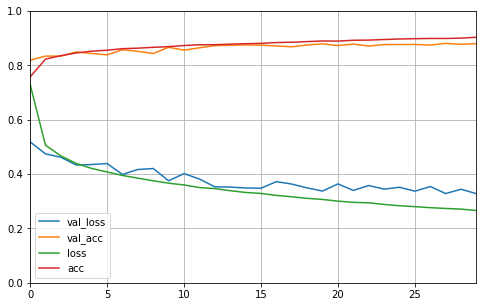

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

We see that both the training and validation accuracy increase during training, while loss decrease. The validation curves are quite close to the training curves, which means that there is not too much overfitting.

If you are not satisfied with the performance of the model, you can tune the model's hyperparameter and train the model again. You can modify the number of neurons per layer, the number of layers, the types of activation functiuons for each hidden layer, the number of epochs, the batch size(by default it is 32)